# Loan prediction model


Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.


| Variable | Description |
| --- | --- |
| Loan_ID | Unique Loan id |
| Gender | Male / Female |
| Married | Martial Status |
| Dependents | Number of dependents |
| Education | Applicant Education (Graduate/ Under Graduate ) |
| Self_Employed | Y/N |
| ApplicantIncome | Income of the applicant |
| CoapplicantIncome | Coapplicant income |
| LoanAmount | Amount in thousand |
| Loan_Amount_Term | term of loans in month |
| Credit_History | credit score |
| Property_Area | urban/semi urban/ rural |
| Loan_Status | Description |


Download link: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

# Libraries
 - pandas
 - matplotlib
 - seaborn
 - scikit learn


# Algorithm
- logistic Regression
- Decision Tree
- Random Forest
- Extra Trees

# Import modules

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv("Loan Prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the dataset

In [5]:
#find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# fill the miss-ing values for numerical term - mean
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())
df["CoapplicantIncome"] = df["CoapplicantIncome"].fillna(df["CoapplicantIncome"].mean())


In [7]:
df["Gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [8]:
df["Gender"].mode()

0    Male
dtype: object

In [9]:
#filling the categorical data
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

In [10]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Explotary data analysis

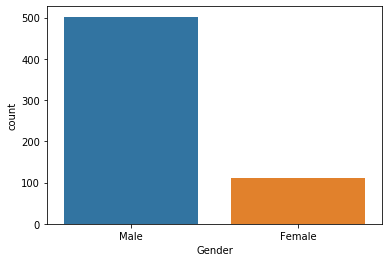

In [11]:
sns.countplot(df["Gender"])

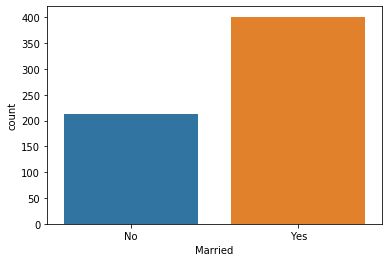

In [12]:
sns.countplot(df["Married"])

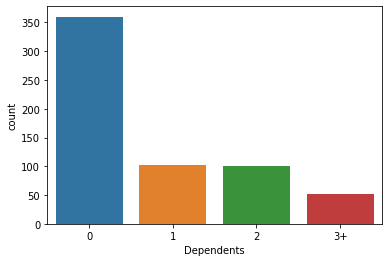

In [13]:
sns.countplot(df.Dependents)

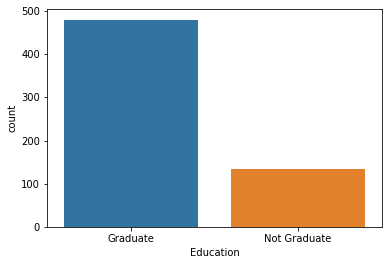

In [14]:
sns.countplot(df.Education)

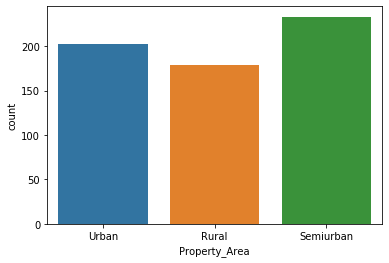

In [15]:
sns.countplot(df.Property_Area)

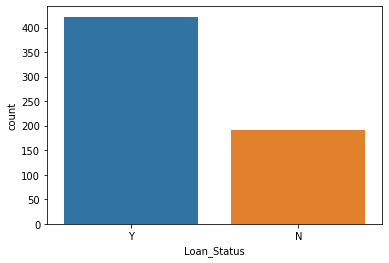

In [16]:
sns.countplot(df.Loan_Status)

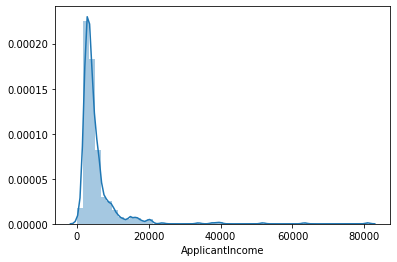

In [17]:
sns.distplot(df.ApplicantIncome)

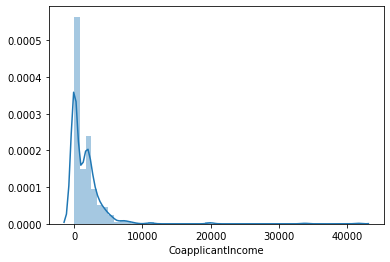

In [18]:
sns.distplot(df.CoapplicantIncome)

In [19]:
df[df["CoapplicantIncome"]==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.000000,360.0,1.000000,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.000000,240.0,0.842199,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.000000,360.0,1.000000,Semiurban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.000000,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.000000,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.000000,Urban,Y


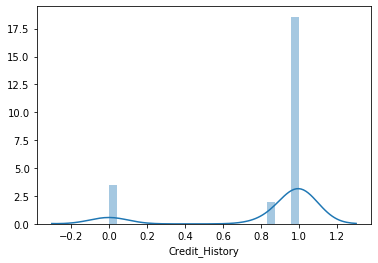

In [20]:
sns.distplot(df["Credit_History"],kde_kws = {'bw' : 0.1})

In [21]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

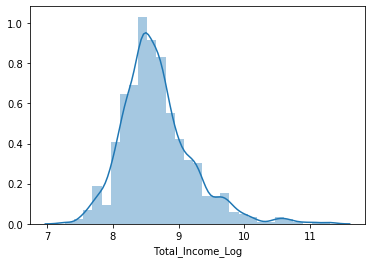

In [22]:
df["Total_Income_Log"]= np.log(df["TotalIncome"])
sns.distplot(df["Total_Income_Log"],kde_kws = {'bw' : 0.1})

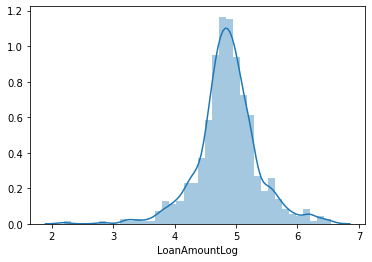

In [62]:
df["LoanAmountLog"] = np.log(df["LoanAmount"])
sns.distplot(df["LoanAmountLog"],kde_kws = {'bw':0.1})

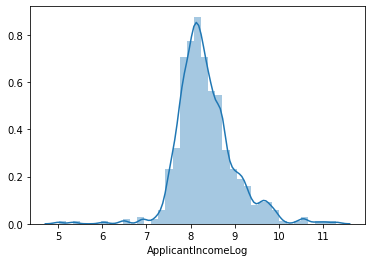

In [23]:
df["ApplicantIncomeLog"] = np.log(df.ApplicantIncome)
sns.distplot(df["ApplicantIncomeLog"],kde_kws = {'bw' : 0.1})

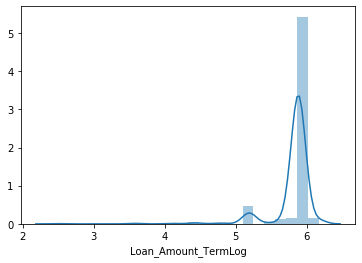

In [24]:
df["Loan_Amount_TermLog"] = np.log(df["Loan_Amount_Term"])
sns.distplot(df["Loan_Amount_TermLog"],kde_kws = {'bw' : 0.1})

In [26]:
np.log(df["CoapplicantIncome"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0          -inf
1      7.318540
2          -inf
3      7.765569
4          -inf
         ...   
609        -inf
610        -inf
611    5.480639
612        -inf
613        -inf
Name: CoapplicantIncome, Length: 614, dtype: float64

In [28]:
df["CoApplicantIncomeLog"] =  np.log(df["CoapplicantIncome"])

In [33]:
#handling the neg infinity
np.isneginf(df["CoApplicantIncomeLog"]).sum()

273

In [37]:
np.isneginf(df["CoApplicantIncomeLog"])

0       True
1      False
2       True
3      False
4       True
       ...  
609     True
610     True
611    False
612     True
613     True
Name: CoApplicantIncomeLog, Length: 614, dtype: bool

In [50]:
#replacing the -inf with nan
df["CoApplicantIncomeLog"].replace([np.inf, -np.inf], np.nan, inplace=True)

In [54]:
#replacing the nan with zeroes
df["CoApplicantIncomeLog"].replace(np.nan,0,inplace = True)

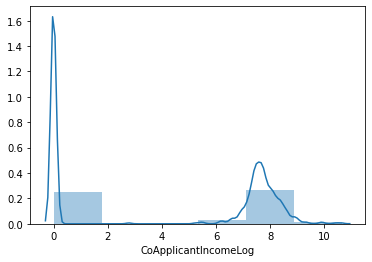

In [56]:
sns.distplot(df["CoApplicantIncomeLog"],kde_kws = {'bw' : 0.1})

# Coorelation Matrix

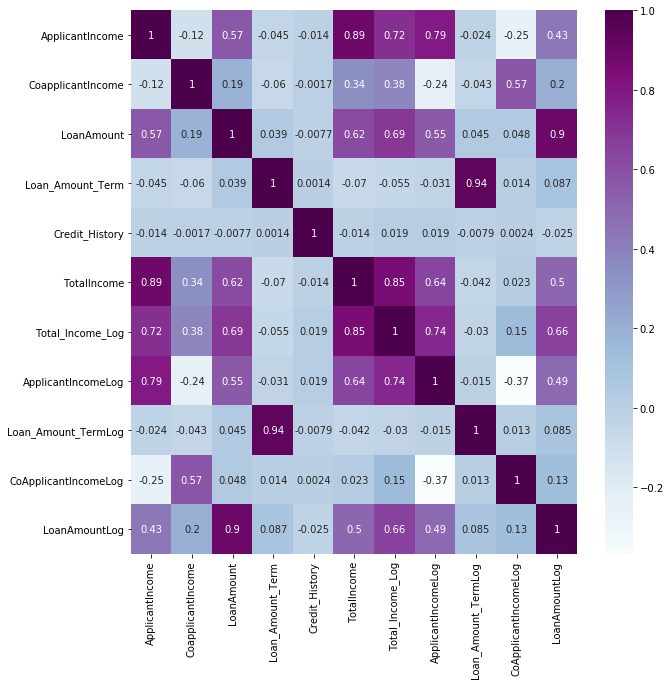

In [63]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap = "BuPu")

In [109]:
#dropping the orignal term and keeping the log term for training the model.

df.drop(["Loan_ID",'Loan_Amount_Term','TotalIncome','CoapplicantIncome','ApplicantIncome','LoanAmount'],axis=1,inplace = True)

# Label Encoding


In [68]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_Log,ApplicantIncomeLog,Loan_Amount_TermLog,CoApplicantIncomeLog,LoanAmountLog
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,8.674026,5.886104,0.000000,4.986426
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,8.430109,5.886104,7.318540,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,8.006368,5.886104,0.000000,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,7.856707,5.886104,7.765569,4.787492
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,8.699515,5.886104,0.000000,4.948760


In [69]:
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Self_Employed","Dependents","Property_Area","Loan_Status"]

In [70]:
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [73]:
df["Education"] = le.fit_transform(df["Education"])

In [93]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_Log,ApplicantIncomeLog,Loan_Amount_TermLog,CoApplicantIncomeLog,LoanAmountLog
0,LP001002,1,0,0,0,0,1.0,2,1,8.674026,8.674026,5.886104,0.000000,4.986426
1,LP001003,1,1,1,0,0,1.0,0,0,8.714568,8.430109,5.886104,7.318540,4.852030
2,LP001005,1,1,0,0,1,1.0,2,1,8.006368,8.006368,5.886104,0.000000,4.189655
3,LP001006,1,1,0,1,0,1.0,2,1,8.505323,7.856707,5.886104,7.765569,4.787492
4,LP001008,1,0,0,0,0,1.0,2,1,8.699515,8.699515,5.886104,0.000000,4.948760


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    int32  
 2   Married               614 non-null    int32  
 3   Dependents            614 non-null    int32  
 4   Education             614 non-null    int32  
 5   Self_Employed         614 non-null    int32  
 6   Credit_History        614 non-null    float64
 7   Property_Area         614 non-null    int32  
 8   Loan_Status           614 non-null    int32  
 9   Total_Income_Log      614 non-null    float64
 10  ApplicantIncomeLog    614 non-null    float64
 11  Loan_Amount_TermLog   614 non-null    float64
 12  CoApplicantIncomeLog  614 non-null    float64
 13  LoanAmountLog         614 non-null    float64
dtypes: float64(6), int32(7), object(1)
memory usage: 50.5+ KB


# Train - Test Split

In [112]:
x = df.drop(columns = ["Loan_Status"])

In [113]:
y = df["Loan_Status"]

In [114]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Total_Income_Log,ApplicantIncomeLog,Loan_Amount_TermLog,CoApplicantIncomeLog,LoanAmountLog
0,1,0,0,0,0,1.0,2,8.674026,8.674026,5.886104,0.000000,4.986426
1,1,1,1,0,0,1.0,0,8.714568,8.430109,5.886104,7.318540,4.852030
2,1,1,0,0,1,1.0,2,8.006368,8.006368,5.886104,0.000000,4.189655
3,1,1,0,1,0,1.0,2,8.505323,7.856707,5.886104,7.765569,4.787492
4,1,0,0,0,0,1.0,2,8.699515,8.699515,5.886104,0.000000,4.948760


In [115]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

# Model Training

In [117]:
from sklearn.model_selection import cross_val_score
def classify( model, x, y ):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
    model.fit(x_train, y_train)
    print("Accuracy is ", (model.score(x_test, y_test))*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross validation score is ", np.mean(score))

In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy is  77.27272727272727
Cross validation score is  0.8078368652538984


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [120]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy is  74.02597402597402
Cross validation score is  0.7361721977875517


In [124]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,x,y)

Accuracy is  75.97402597402598
Cross validation score is  0.7785285885645742


In [125]:
from sklearn.linear_model import LogisticRegression 
model  = LogisticRegression()
classify(model,x, y)

Accuracy is  77.27272727272727
Cross validation score is  0.8078368652538984


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [129]:
model = RandomForestClassifier(n_estimators= 120,min_samples_split=25,max_depth= 7, max_features =1)
classify(model,x,y)

Accuracy is  74.02597402597402
Cross validation score is  0.7996934559509529


# Confusion Matrix 

In [130]:
model  = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

In [132]:
cm

array([[25, 29],
       [ 4, 96]], dtype=int64)

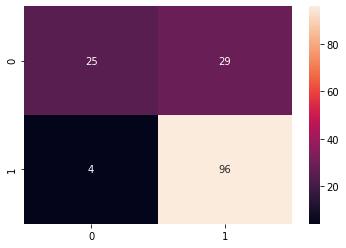

In [133]:
sns.heatmap(cm,annot = True)